## ☁️ Connect G-Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/Homework 2 AN2DL condivisa/Fixing Labels

Mounted at /gdrive
[Errno 2] No such file or directory: '/gdrive/My Drive/Homework 2 AN2DL condivisa/Fixing Labels'
/content


## ⚒️ Import libraries


In [ ]:
# Set seed for reproducibility
seed = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(seed)
random.seed(seed)

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
from matplotlib import cm

# Set seed for TensorFlow
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Reduce TensorFlow verbosity
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Print TensorFlow version
print(tf.__version__)

# Import other libraries
import os
import math
from PIL import Image
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plot display settings
#sns.set(font_scale=1.4)
sns.set_style('white')
#plt.rc('font', size=14)
%matplotlib inline

2.17.1


## 📊 Load data

In [ ]:
data = np.load("../Datasets/Dataset_cleaned.npz")
training_set = data["training_set"]

X_train = training_set[0, :]
y_train = training_set[1, :]

X_test = data["test_set"]

print("Shape of training images: ", X_train.shape)
print("Shape of training labels: ", y_train.shape)
print("Shape of test images: ", X_test.shape)

Shape of training images:  (2505, 64, 128)
Shape of training labels:  (2505, 64, 128)
Shape of test images:  (10022, 64, 128)


## Correction of the labels 🧹

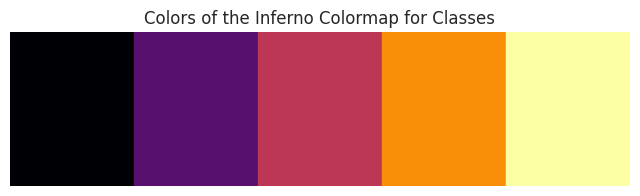

Value: 0, Class: Background, RGB: [0.001462 0.000466 0.013866], Alpha: 1.0
Value: 1, Class: Soil, RGB: [0.3415   0.062325 0.429425], Alpha: 1.0
Value: 2, Class: Bedrock, RGB: [0.735683 0.215906 0.330245], Alpha: 1.0
Value: 3, Class: Sand, RGB: [0.978422 0.557937 0.034931], Alpha: 1.0
Value: 4, Class: Big Rock, RGB: [0.988362 0.998364 0.644924], Alpha: 1.0


In [ ]:
# Values to map to the colormap
values = np.array([0, 1, 2, 3, 4])

# Normalize values to the range [0, 1] for colormap
normalized_values = values / values.max()

# Get colormap and corresponding colors
cmap = cm.inferno
colors = cmap(normalized_values)

# Class names for the labels
class_names = ['Background', 'Soil', 'Bedrock', 'Sand', 'Big Rock']

# Display the colors and their values
fig, ax = plt.subplots(figsize=(8, 2))
for i, (val, color) in enumerate(zip(values, colors)):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))
ax.set_xlim(0, len(values))
ax.set_ylim(0, 1)

# Customize the x-axis
ax.set_xticks(np.arange(len(values)) + 0.5)
ax.set_xticklabels(class_names, fontsize=10, rotation=45, ha='right')
ax.tick_params(axis='x', length=0)
ax.axis('off')
plt.title("Colors of the Inferno Colormap for Classes")
plt.show()

# Print RGB values
for val, color in zip(values, colors):
    print(f"Value: {val}, Class: {class_names[val]}, RGB: {color[:3]}, Alpha: {color[3]}")

## One-color only ⚫ 🟣 🔴 🟠 🟡

In [ ]:
# Detecting images with a single color in the images
idx_monocolor = []
for i in range(y_train.shape[0]):
  if (np.all(y_train[i] == 0) or np.all(y_train[i] == 1.) or np.all(y_train[i] == 2.) or np.all(y_train[i] == 3.) or np.all(y_train[i] == 4.)):
    idx_monocolor.append(i)

print("Number of monocolor images: ", len(idx_monocolor))
print("Indexes : ", idx_monocolor)

Number of monocolor images:  425
Indexes :  [13, 19, 22, 25, 39, 43, 44, 62, 63, 65, 66, 68, 73, 81, 82, 86, 94, 95, 127, 131, 142, 148, 152, 180, 183, 188, 190, 204, 210, 213, 236, 246, 253, 259, 260, 277, 286, 295, 309, 314, 319, 324, 329, 335, 338, 341, 348, 355, 360, 361, 363, 366, 367, 371, 372, 376, 377, 396, 403, 433, 434, 436, 444, 451, 465, 466, 467, 468, 472, 474, 481, 482, 484, 485, 490, 491, 498, 500, 508, 515, 520, 527, 532, 533, 537, 542, 546, 548, 550, 553, 563, 567, 569, 570, 574, 575, 576, 584, 596, 607, 619, 627, 629, 630, 631, 636, 637, 641, 643, 644, 647, 649, 650, 652, 658, 659, 663, 670, 676, 677, 688, 690, 700, 702, 707, 709, 710, 713, 715, 727, 730, 736, 755, 758, 773, 775, 789, 791, 792, 802, 805, 806, 809, 810, 815, 818, 820, 823, 828, 835, 842, 855, 857, 861, 866, 875, 887, 889, 908, 911, 916, 923, 932, 933, 941, 943, 951, 952, 954, 967, 970, 971, 978, 982, 984, 992, 1000, 1006, 1019, 1025, 1044, 1045, 1048, 1062, 1071, 1076, 1088, 1108, 1113, 1127, 1133, 113

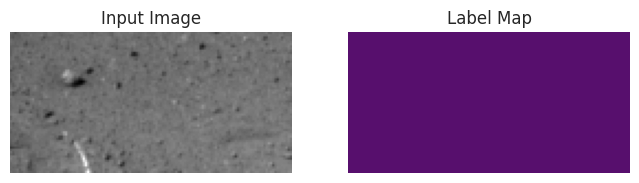

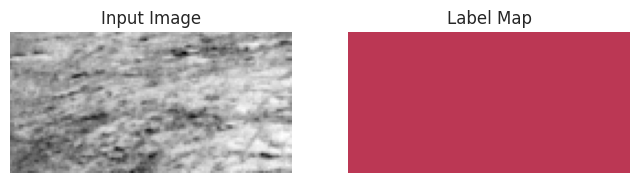

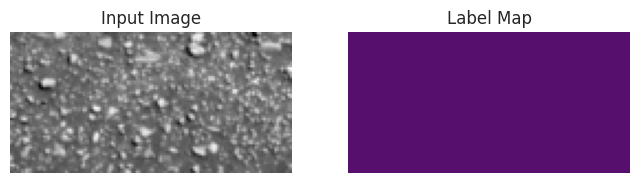

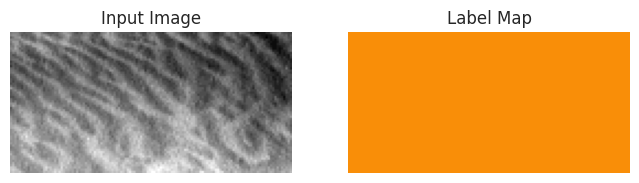

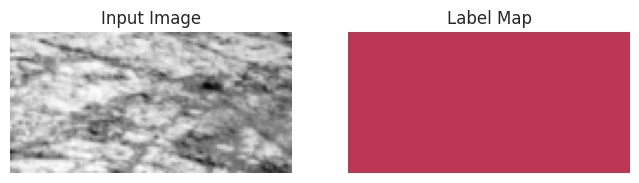

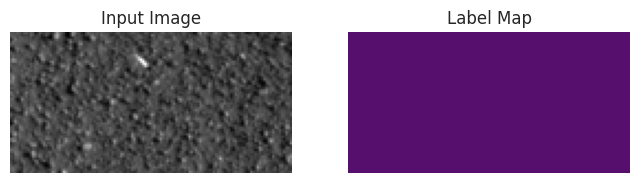

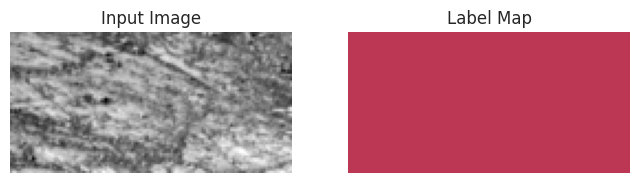

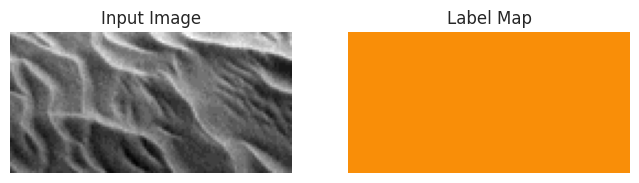

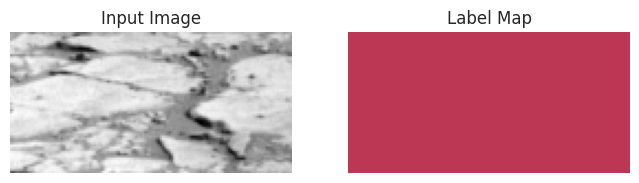

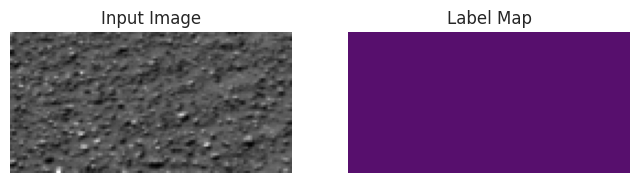

In [ ]:
# Printing some monocolor labels

# Randomly sample 10 indices from idx_monocolor
sampled_indices = np.random.choice(idx_monocolor, size = 10, replace=False)

# Plot the sampled images and labels
for idx in sampled_indices:
    plt.figure(figsize=(8, 4))

    # Plot the input image (X_train)
    plt.subplot(1, 2, 1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.axis('off')
    plt.title("Input Image")

    # Plot the label map (y_train)
    plt.subplot(1, 2, 2)
    plt.imshow(y_train[idx], cmap='inferno', vmin=0, vmax=4)
    plt.axis('off')
    plt.title("Label Map")

    plt.show()

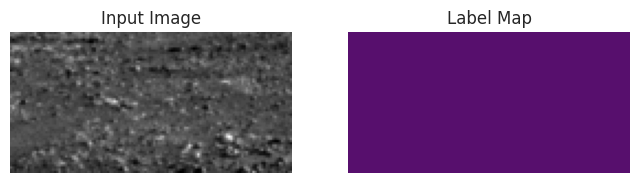

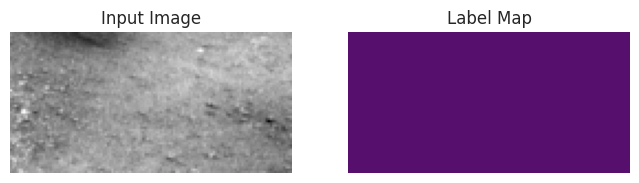

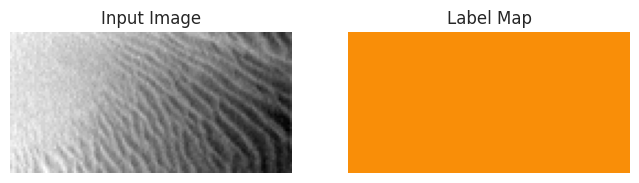

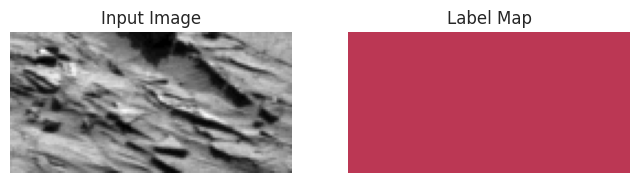

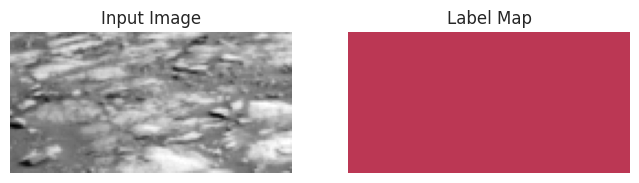

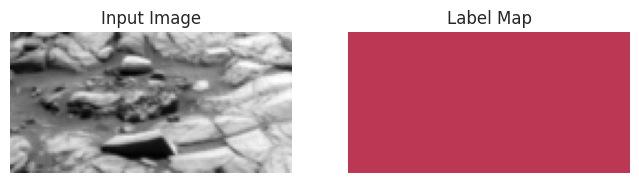

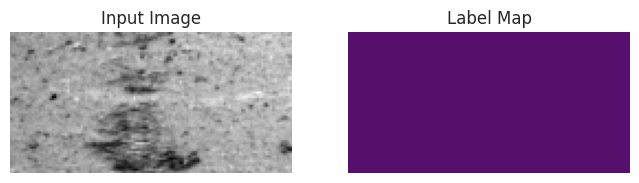

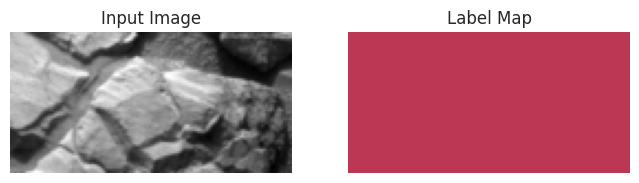

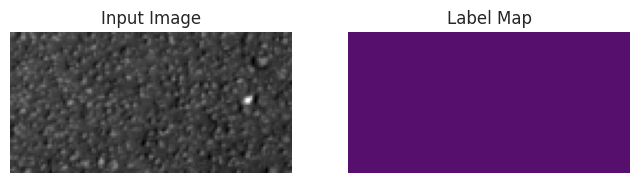

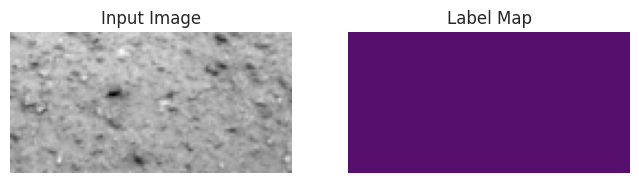

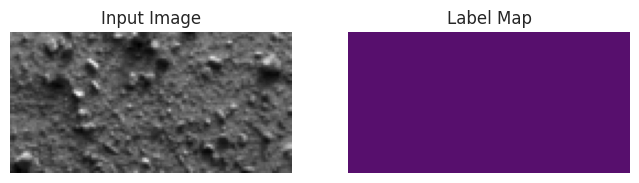

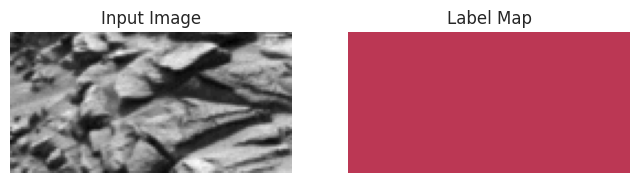

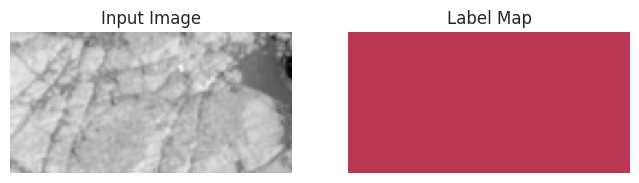

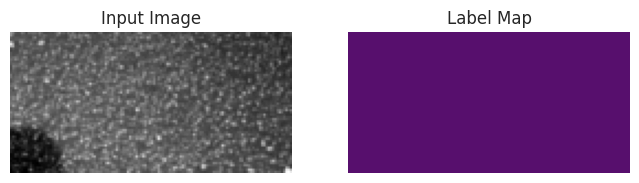

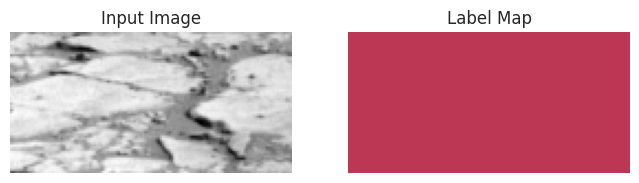

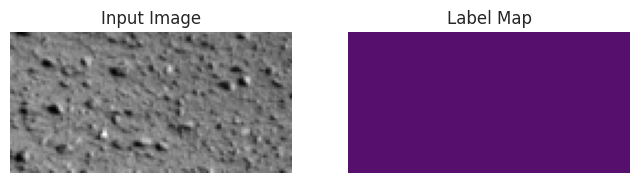

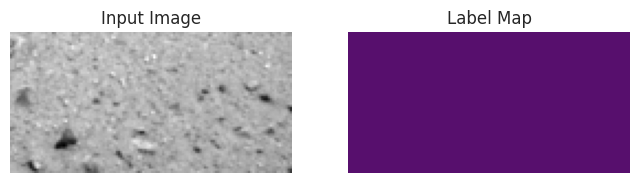

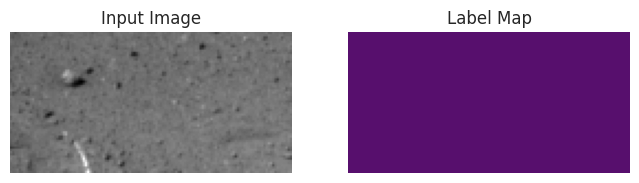

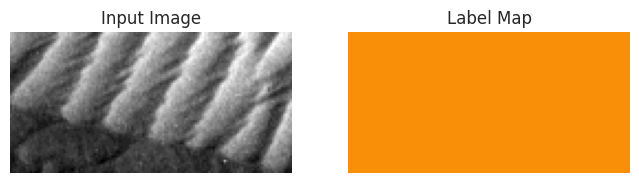

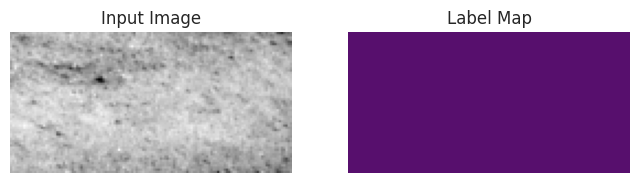

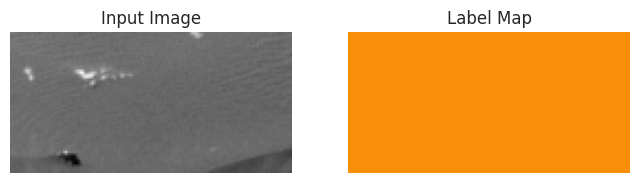

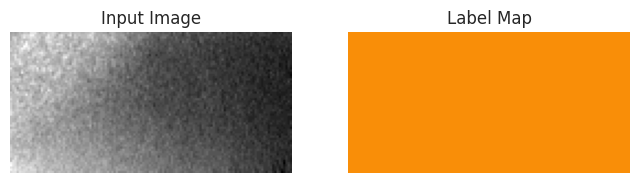

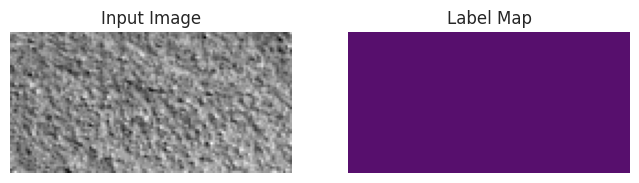

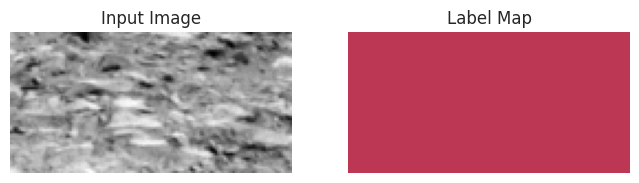

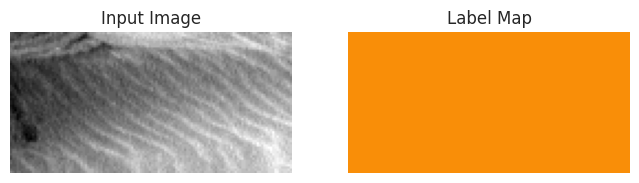

In [ ]:
# Correcting the labels

# Scanning 50 images each time to detect possible error
start = 8 * 50

for j in range(0, 50):

    chosen_index = idx_monocolor[start + j]

    # Plotting the image with its label

    plt.figure(figsize = (8, 4))

    # Plot the input image (X_train)
    plt.subplot(1, 2, 1)
    plt.imshow(X_train[chosen_index], cmap='gray')
    plt.axis('off')
    plt.title("Input Image")

    # Plot the label map (y_train)
    plt.subplot(1, 2, 2)
    plt.imshow(y_train[chosen_index], cmap='inferno', vmin=0, vmax=4)
    plt.axis('off')
    plt.title("Label Map")

    plt.show()

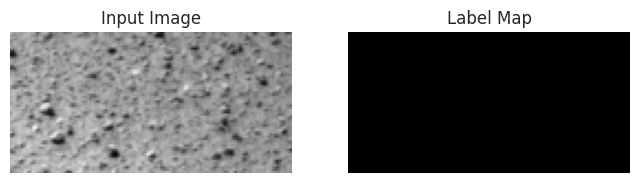

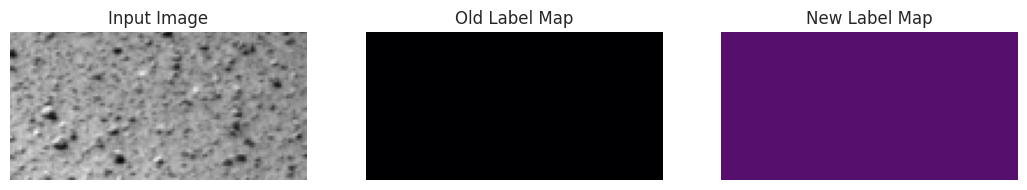

In [ ]:
# Correcting the segmentation map where there are errors
# Correcting the labels one by one
chosen_index = idx_monocolor[230]

plt.figure(figsize = (8, 4))

# Plot the input image (X_train)
plt.subplot(1, 2, 1)
plt.imshow(X_train[chosen_index], cmap='gray')
plt.axis('off')
plt.title("Input Image")

# Plot the label map (y_train)
plt.subplot(1, 2, 2)
plt.imshow(y_train[chosen_index], cmap='inferno')
plt.axis('off')
plt.title("Label Map")

plt.show()

# Plotting the image with its label and the corrected label

plt.figure(figsize = (13, 4))

# Plot the input image (X_train)
plt.subplot(1, 3, 1)
plt.imshow(X_train[chosen_index], cmap='gray')
plt.axis('off')
plt.title("Input Image")

# Plot the label map (y_train)
plt.subplot(1, 3, 2)
plt.imshow(y_train[chosen_index], cmap='inferno', vmin=0, vmax=4)
plt.axis('off')
plt.title("Old Label Map")

new_label_map = np.zeros_like(y_train[chosen_index])
first_element = y_train[chosen_index][0, 0]
new_label_map[y_train[chosen_index] == first_element] = 1.
y_train[chosen_index] = new_label_map

# Plot the label map (y_train)
plt.subplot(1, 3, 3)
plt.imshow(y_train[chosen_index], cmap='inferno', vmin=0, vmax=4)
plt.axis('off')
plt.title("New Label Map")

plt.show()

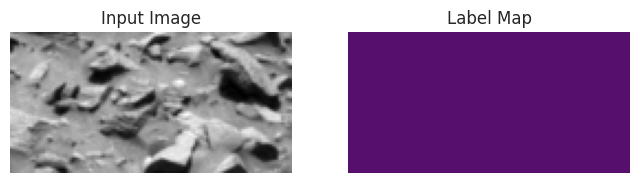

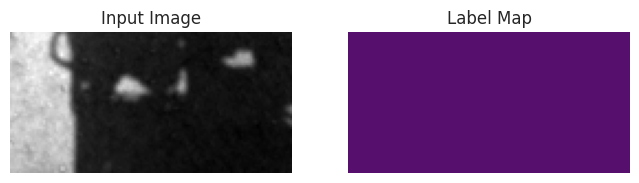

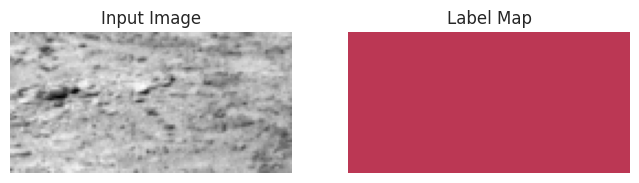

Shape of training images:  (2502, 64, 128)
Shape of training labels:  (2502, 64, 128)


In [ ]:
# Selecting images whose label map is not clear and we have decided to remove,
# since they could lead to misclassification
remove_index = [idx_monocolor[299], idx_monocolor[328], idx_monocolor[397]]


# Printing the images that we remove
for j in range(0, 3):

    # Plotting the image with its label

    plt.figure(figsize = (8, 4))

    # Plot the input image (X_train)
    plt.subplot(1, 2, 1)
    plt.imshow(X_train[remove_index[j]], cmap='gray')
    plt.axis('off')
    plt.title("Input Image")

    # Plot the label map (y_train)
    plt.subplot(1, 2, 2)
    plt.imshow(y_train[remove_index[j]], cmap='inferno', vmin=0, vmax=4)
    plt.axis('off')
    plt.title("Label Map")

    plt.show()


# Removing this images from the training set

# Create a mask that is True for all indices except those in remove_index
mask = np.ones(X_train.shape[0], dtype=bool)
mask[remove_index] = False

# Use the mask to filter out the images from X_train and y_train
X_train = X_train[mask]
y_train = y_train[mask]

print("Shape of training images: ", X_train.shape)
print("Shape of training labels: ", y_train.shape)

In [ ]:
# Save the new dataset
np.savez_compressed("Dataset_fixed_monocolor.npz", training_set = [X_train, y_train], test_set = X_test)

## Corrrectionof the segmentation maps for bicolor maps

In [ ]:
data = np.load("../Datasets/Dataset_fixed_monocolor.npz")
training_set = data["training_set"]

X_train = training_set[0, :]
y_train = training_set[1, :]

X_test = data["test_set"]

print("Shape of training images: ", X_train.shape)
print("Shape of training labels: ", y_train.shape)
print("Shape of test images: ", X_test.shape)

Shape of training images:  (2502, 64, 128)
Shape of training labels:  (2502, 64, 128)
Shape of test images:  (10022, 64, 128)


Number of images with three or more labels:  1170


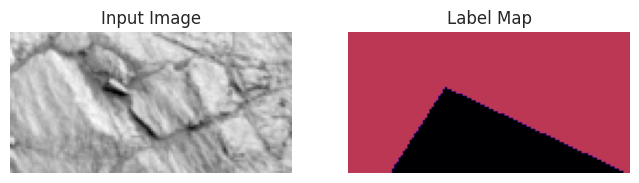

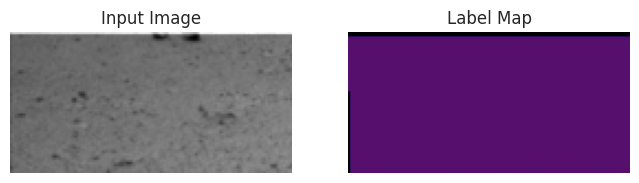

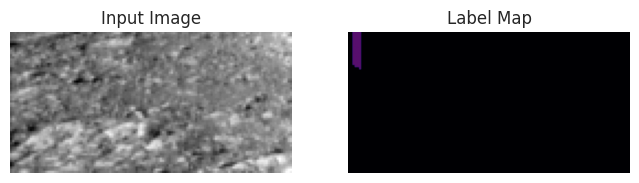

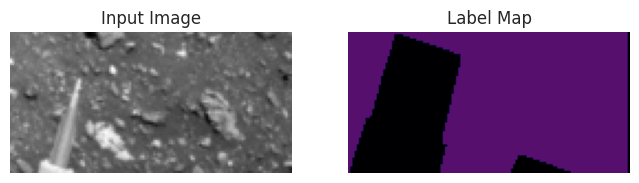

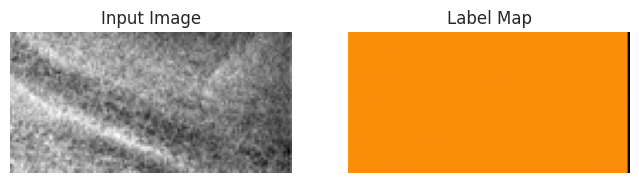

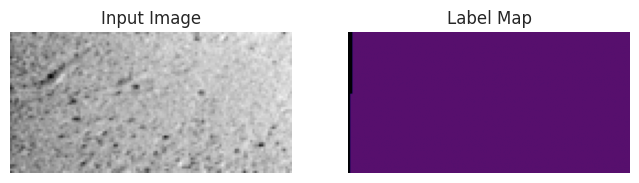

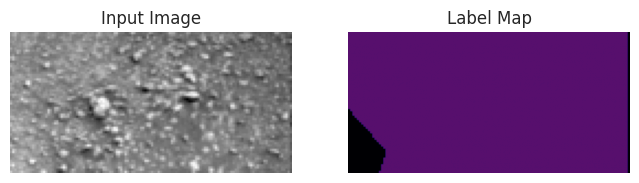

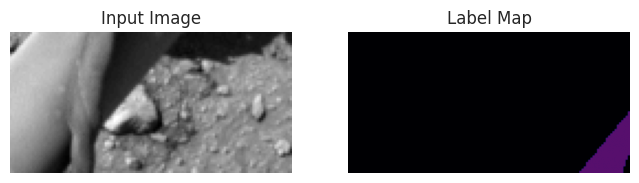

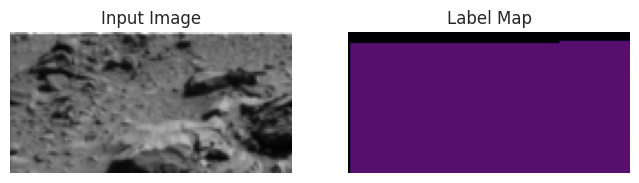

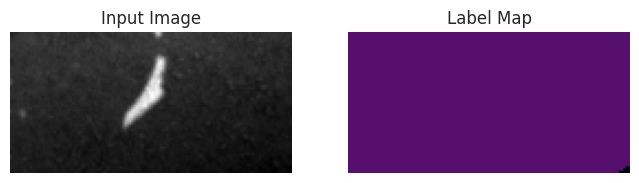

In [ ]:
# Selecting the indeces of the label maps that have more than 2 labels
bicolor_indexes = []
for i in range(0, X_train.shape[0] ):
    count = np.unique(y_train[i]).shape[0]
    if count == 2:
        bicolor_indexes.append(i)

print("Number of images with three or more labels: ", len(bicolor_indexes))

# Printing images and labels

# Randomly sample 10 indices from bicolor_indexes
sampled_indices = np.random.choice(bicolor_indexes, size = 10, replace=False)

for j in range(0, len(sampled_indices)):

    # Plotting the image with its label

    plt.figure(figsize = (8, 4))

    # Plot the input image (X_train)
    plt.subplot(1, 2, 1)
    plt.imshow(X_train[sampled_indices[j]], cmap='gray')
    plt.axis('off')
    plt.title("Input Image")

    # Plot the label map (y_train)
    plt.subplot(1, 2, 2)
    plt.imshow(y_train[sampled_indices[j]], cmap='inferno', vmin=0, vmax=4)
    plt.axis('off')
    plt.title("Label Map")

    plt.show()


In [ ]:
# Correcting the labels

# Scanning 50 images each time to detect possible error
start = 13 * 50

for j in range(0, 50):

    chosen_index = bicolor_indexes[start + j]
    print("Index of the image: ", chosen_index)

    # Plotting the image with its label

    plt.figure(figsize = (8, 4))

    # Plot the input image (X_train)
    plt.subplot(1, 2, 1)
    plt.imshow(X_train[chosen_index], cmap='gray')
    plt.axis('off')
    plt.title("Input Image")

    # Plot the label map (y_train)
    plt.subplot(1, 2, 2)
    plt.imshow(y_train[chosen_index], cmap='inferno', vmin=0, vmax=4)
    plt.axis('off')
    plt.title("Label Map")

    plt.show()

Output hidden; open in https://colab.research.google.com to view.

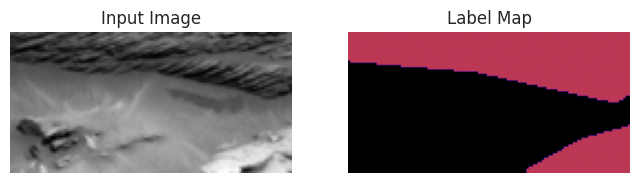

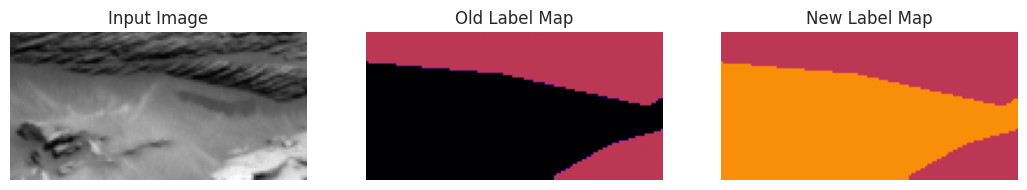

In [ ]:
# Correcting the segmentation map where there are errors

# Correcting the labels one by one
chosen_index = 760
label_to_change1 = 0.
label_to_assign1 = 3.
label_to_change2 = 4.
label_to_assign2 = 4.

# Making a copy of the old segmentation map
y_train_old = y_train[chosen_index].copy()

plt.figure(figsize = (8, 4))

# Plot the input image (X_train)
plt.subplot(1, 2, 1)
plt.imshow(X_train[chosen_index], cmap='gray')
plt.axis('off')
plt.title("Input Image")

# Plot the label map (y_train)
plt.subplot(1, 2, 2)
plt.imshow(y_train_old, cmap='inferno', vmin=0, vmax=4)
plt.axis('off')
plt.title("Label Map")

plt.show()

# Plotting the image with its label and the corrected label

plt.figure(figsize = (13, 4))

# Plot the input image (X_train)
plt.subplot(1, 3, 1)
plt.imshow(X_train[chosen_index], cmap='gray')
plt.axis('off')
plt.title("Input Image")

# Plot the label map (y_train)
plt.subplot(1, 3, 2)
plt.imshow(y_train[chosen_index], cmap='inferno', vmin=0, vmax=4)
plt.axis('off')
plt.title("Old Label Map")

new_label_map = y_train[chosen_index].copy()
new_label_map[y_train[chosen_index] == label_to_change1] = label_to_assign1
#new_label_map[y_train[chosen_index] == label_to_change2] = label_to_assign2
y_train[chosen_index] = new_label_map

# Plot the label map (y_train)
plt.subplot(1, 3, 3)
plt.imshow(y_train[chosen_index], cmap='inferno', vmin=0, vmax=4)
plt.axis('off')
plt.title("New Label Map")

plt.show()

In [ ]:
# Save the new dataset
np.savez_compressed("Dataset_fixed_bicolor.npz", training_set = [X_train, y_train], test_set = X_test)